In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading in all the datasets from 2011-2021

df2021=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2021.xlsx",header=5)
df2020=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2020.xlsx",header=5)
df2019=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2019.xlsx",header=5)
df2018=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2018.xlsx",header=5)
df2017=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2017.xlsx",header=5)
df2016=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2016.xlsx",header=5)
df2015=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2015.xlsx",header=5)
df2014=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2014.xlsx",header=5)
df2013=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2013.xlsx",header=5)
df2012=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2012.xlsx",header=5)
df2011=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2011.xlsx",header=5)

# Add in the years and rename the columns

df2021['Unnamed: 10'] = 2021
df2020['Unnamed: 10'] = 2020
df2019['Unnamed: 10'] = 2019
df2018['Unnamed: 10'] = 2018
df2017['Unnamed: 10'] = 2017
df2016['Unnamed: 10'] = 2016
df2015['Unnamed: 10'] = 2015
df2014['Unnamed: 10'] = 2014
df2013['Unnamed: 10'] = 2013
df2012['Unnamed: 10'] = 2012
df2011['Unnamed: 10'] = 2011


#df=pd.concat([df2021,df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011])

#df = df.rename(columns={'Unnamed: 0':'Occupation','Unnamed: 1':'Total','Unnamed: 2':'16-19','Unnamed: 3':'20-24','Unnamed: 4':'25-34','Unnamed: 5':'35-44','Unnamed: 6':'45-54','Unnamed: 7':'55-64','Unnamed: 8':'65<=','Unnamed: 9':'Median age','Unnamed: 10':'Year'})


In [3]:
joint_processed=pd.read_csv("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data cleaning/Processed Data.csv")


Plots

In [5]:
# Detailed Occupation

detailed=joint_processed[joint_processed['Detailed Occupation']!='-']
detailed_sum=detailed.groupby(['Year']).sum()
detailed_sum_arr=detailed_sum['Total'].to_numpy()

total=pd.concat([df2021,df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011])

total = total.rename(columns={'Unnamed: 0':'Occupation','Unnamed: 1':'Total','Unnamed: 2':'16-19','Unnamed: 3':'20-24','Unnamed: 4':'25-34','Unnamed: 5':'35-44','Unnamed: 6':'45-54','Unnamed: 7':'55-64','Unnamed: 8':'65<=','Unnamed: 9':'Median age','Unnamed: 10':'Year'})

# Employed  civilian labour force
total_employed_arr=total.loc[total['Occupation']=='Total employed',['Total']].to_numpy()
total_employed_arr=np.flip(total_employed_arr)

# Total civilian labour force
total_arr=np.array([[153617,154975,155389,155922,157130,159187,160320,162075,163539,160742,161204]]).reshape((11,1))


detailed_sum_arr=detailed_sum_arr.reshape(-1,1)

year=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

#plt.bar(year,(detailed_sum_arr/total_arr).reshape(11,))     # Proportion of Detailed occupations wrt total employed
# print((detailed_sum_arr/total_arr))

In [6]:
# Major Group

major=joint_processed[(joint_processed['Minor Group']=='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]
major_sum=major.groupby(['Year']).sum()
major_sum_arr=major_sum['Total'].to_numpy()

major_sum_arr=major_sum_arr.reshape(-1,1)

#plt.bar(year,(major_sum_arr/total_arr).reshape(11,))     # Proportion of Major Group occupations wrt total employed
# print((major_sum_arr/total_arr))

# Ratio of 'Minor Group' to US civilian labour force

minor=joint_processed[(joint_processed['Minor Group']!='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]
minor_sum=minor.groupby(['Year']).sum()
minor_sum_arr=minor_sum['Total'].to_numpy()

minor_sum_arr=minor_sum_arr.reshape(-1,1)

In [7]:
# Ratio of 'Broad Group' to US civilian labour force

broad=joint_processed[(joint_processed['Minor Group']!='-')&(joint_processed['Broad Group']!='-')&(joint_processed['Detailed Occupation']=='-')]
broad_sum=broad.groupby(['Year']).sum()
broad_sum_arr=broad_sum['Total'].to_numpy()

broad_sum_arr=broad_sum_arr.reshape(-1,1)

In [9]:
# Old Proportion

young=joint_processed.iloc[:,2:7].sum(axis=1)
total_num=joint_processed['Total']
old=joint_processed[['55-64','65<=']].sum(axis=1)

old_prop=old/total_num
old_prop=pd.concat([joint_processed[['Occupation','Year','Major Group','Minor Group','Broad Group','Detailed Occupation']],old_prop],axis=1)
old_prop=old_prop.rename(columns={0:'Old Proportion'})
OP_major = old_prop[(old_prop['Minor Group']=='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]

Text(0, 0.5, 'OP averaged across the Major Groups')

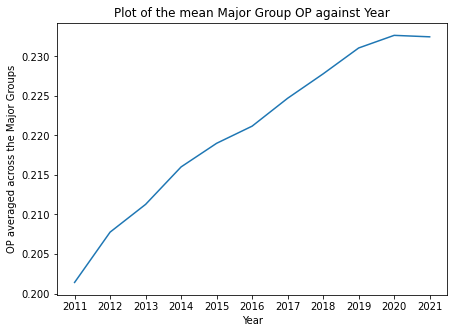

In [10]:
# OP mean for Major Groups against Year

OP_major_mean=OP_major.loc[old_prop['Old Proportion']!=np.inf,['Year','Old Proportion']].groupby('Year').agg('mean')     # Note than certain ratios are inf because those occupations have zero young people; need to filter them out first

#plt.rcParams["figure.figsize"] = [7.00, 4]
#plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(figsize=(7,5)) 
plt.plot(range(len(OP_major_mean)),OP_major_mean)      # Change in ratio over Major Groups over the years
plt.xticks(range(len(OP_major_mean)), OP_major_mean.index)
plt.title('Plot of the mean Major Group OP against Year')
plt.xlabel('Year')
plt.ylabel('OP averaged across the Major Groups')
#plt.grid()
#plt.show()
#plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Mean Major Group Old Proportion against Year")



[(2010.5, 2021.5), (0.07, 0.4)]

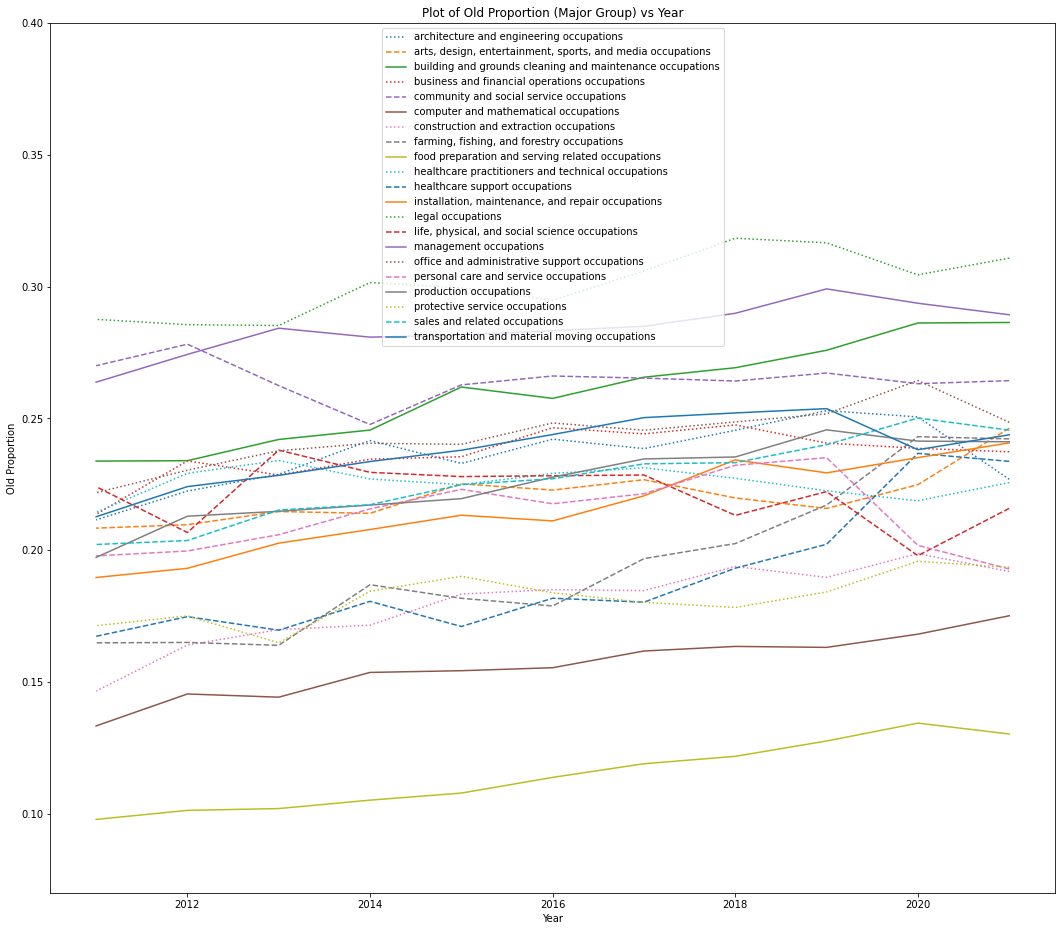

In [11]:
# plot groupby results on the same canvas 
fig, ax = plt.subplots(figsize=(18,16)) 
#color = iter(plt.cm.rainbow(np.linspace(0, 1, 21)))
style = [':','--','-']
style+=style+style+style+style+style+style
i=0
for id, group in OP_major.groupby('Occupation'): 
    #c=next(color)
    s=style[i]
    group.plot(y='Old Proportion', x='Year', title='Plot of Old Proportion (Major Group) vs Year', ax=ax,label=id,linestyle=s)
    i+=1
#ratio_major.groupby('Occupation').plot(kind='line', x = "Year", y = "Ratio", ax=ax,legend=True)
plt.ylabel('Old Proportion')
ax.set(xlim=(2010.5, 2021.5), ylim=(0.07, 0.4))   # Zoom in on plot
#plt.show()

#plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Old Proportion against Year")

In [12]:
# Percentage change of OP

prop_two_years=OP_major[(OP_major['Year']==2021)|(OP_major['Year']==2011)]
prop_2011=prop_two_years.loc[prop_two_years['Year']==2011,'Old Proportion'].to_numpy()
prop_2021=prop_two_years.loc[prop_two_years['Year']==2021,'Old Proportion'].to_numpy()
percentage_change = pd.DataFrame(np.concatenate([prop_two_years.drop_duplicates('Occupation')['Occupation'].to_numpy().reshape(21,1),((prop_2021-prop_2011)/prop_2011).reshape(21,1)],axis=1))
percentage_change = percentage_change.sort_values([1],ascending=True)

[Text(0, 0, '-0.03679'),
 Text(0, 0, '-0.0250628'),
 Text(0, 0, '-0.0209976'),
 Text(0, 0, '0.0527418'),
 Text(0, 0, '0.0728319'),
 Text(0, 0, '0.0807896'),
 Text(0, 0, '0.0969931'),
 Text(0, 0, '0.111096'),
 Text(0, 0, '0.120462'),
 Text(0, 0, '0.129367'),
 Text(0, 0, '0.146236'),
 Text(0, 0, '0.182016'),
 Text(0, 0, '0.21457'),
 Text(0, 0, '0.222477'),
 Text(0, 0, '0.224972'),
 Text(0, 0, '0.269277'),
 Text(0, 0, '0.309545'),
 Text(0, 0, '0.313473'),
 Text(0, 0, '0.331276'),
 Text(0, 0, '0.396682'),
 Text(0, 0, '0.469494')]

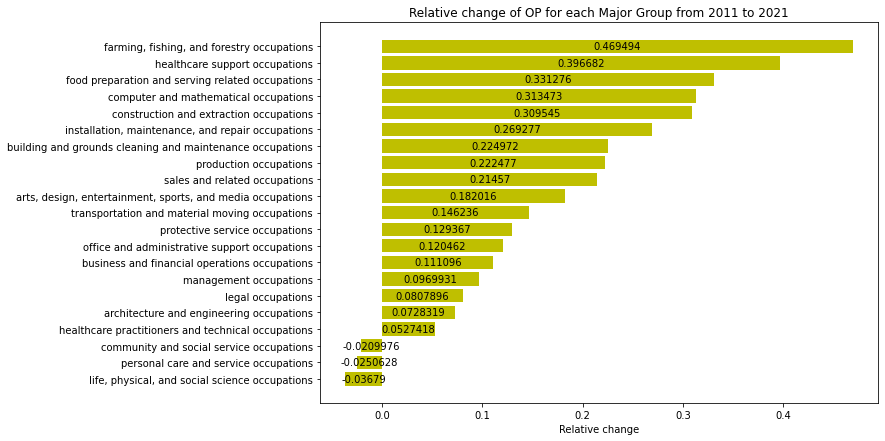

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
bars = ax.barh(percentage_change[0],percentage_change[1],color='y')
plt.title('Relative change of OP for each Major Group from 2011 to 2021')
plt.xlabel('Relative change')
ax.bar_label(bars,label_type='center')
#plt.show()

#plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Relative change of OP")

## Automatability Data

In [4]:
changes2010=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data cleaning/Changes.xlsx",sheet_name=0)
changes2018=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data cleaning/Changes.xlsx",sheet_name=1)

# Remove unwanted columns

changes2010.drop(changes2010.columns[[0,2,3,4,5,6,7,8,9,10,11,14]],axis=1,inplace=True)
changes2018.drop(changes2018.columns[[0,2,3,4,5,6,7,8,9,10,11,14]],axis=1,inplace=True)

# Lower case all strings
changes2010['Occupation']=changes2010['Occupation'].str.lower()
changes2010['Action']=changes2010['Action'].str.lower()
changes2010['Map to']=changes2010['Map to'].str.lower()

changes2018['Occupation']=changes2018['Occupation'].str.lower()
changes2018['Action']=changes2018['Action'].str.lower()
changes2018['Map to']=changes2018['Map to'].str.lower()

# Remove all rows with 'Action' == '-' since no action needs to be taken

changes2018.drop(index=changes2018[changes2018['Action']=='-'].index,inplace=True)
changes2010.drop(index=changes2010[changes2010['Action']=='-'].index,inplace=True)

In [5]:
# Import automatability data for the US

auto_data=pd.read_excel('/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/US_data_email.xls')


In [6]:
auto_data['Occupation Name']=auto_data['Occupation Name'].str.lower()
test=auto_data[['Occupation Name','BLS codes']]

In [7]:
test2=changes2010.copy()

In [8]:
joint_test2 = pd.merge(left = auto_data, 
         right = test2[test2['Action']=='change'],
        how= 'left',
        left_on='Occupation Name',
        right_on='Occupation')

joint_test2.loc[joint_test2['Action'].notnull(),'Occupation Name']=joint_test2.loc[joint_test2['Action'].notnull(),'Map to']     # Rename
joint_test2.drop(joint_test2.columns[[-1,-2,-3]],axis=1,inplace=True)      # Drop unnecessary columns

auto_processed=joint_test2
auto_processed.rename(columns={'Occupation Name':'Occupation'},inplace=True)

In [9]:
joint_auto=pd.merge(right=auto_processed, left=joint_processed[joint_processed['Detailed Occupation']!='-'],how='inner',left_on='Occupation',right_on='Occupation')  #Combined rows

In [10]:
joint_auto.drop(columns={'BLS codes'},inplace=True)

In [11]:
auto_arr=joint_auto[['Year','Total']].groupby(['Year']).agg(sum).to_numpy()

Text(0, 0.5, 'Ratio')

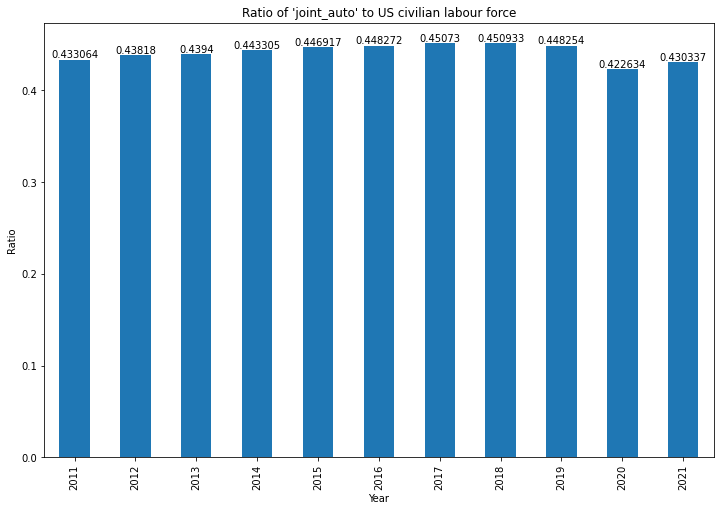

In [22]:
plt.figure(figsize=(12, 8))
fig = pd.Series((auto_arr/total_arr).reshape(11,)).plot(kind='bar')
fig.set_xticklabels(year)
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_title('Ratio of \'joint_auto\' to US civilian labour force')
fig.set_xlabel('Year')
fig.set_ylabel('Ratio')

In [12]:
joint_auto.drop(joint_auto.iloc[:,-18:-1],axis=1,inplace=True)

In [13]:
joint_auto['Old Proportion'] = joint_auto[['55-64','65<=']].sum(axis=1)/joint_auto['Total']
joint_auto.fillna(0,inplace=True)   # Occupations with zero 'Old People' will have null OP, which is basically a zero

# Merge with 'relative change of Elderly Ratio from 2011 to 2021'

In [25]:
joint_auto2011 = joint_auto[joint_auto['Year']==2011][['Occupation','Old Proportion','Probability of Computerisation']]
joint_auto2021 = joint_auto[joint_auto['Year']==2021][['Occupation','Category Label','Old Proportion','Probability of Computerisation']]

joint_auto2011_arr = joint_auto2011['Old Proportion'].to_numpy()
joint_auto2021_arr = joint_auto2021['Old Proportion'].to_numpy()

In [26]:
joint_auto_change=pd.DataFrame((joint_auto2021_arr-joint_auto2011_arr)/joint_auto2011_arr)

<ipython-input-26-97dae5278a1e>:1: RuntimeWarning: divide by zero encountered in true_divide
  joint_auto_change=pd.DataFrame((joint_auto2021_arr-joint_auto2011_arr)/joint_auto2011_arr)
<ipython-input-26-97dae5278a1e>:1: RuntimeWarning: invalid value encountered in true_divide
  joint_auto_change=pd.DataFrame((joint_auto2021_arr-joint_auto2011_arr)/joint_auto2011_arr)


In [27]:
joint_auto_change = joint_auto2021.reset_index().join(joint_auto_change)

In [28]:
joint_auto3 = joint_auto_change[joint_auto_change[0].notnull()]
joint_auto3 = joint_auto3[joint_auto3[0]!=np.inf]

In [29]:
joint_auto3['Probability of Computerisation'].corr(joint_auto3[0],method='pearson')

0.1802119496142559

In [30]:
# Correlation values (Group by Category Label)

pearson3=joint_auto3.groupby('Category Label')[['Probability of Computerisation',0]].corr('pearson').iloc[0::2,-1]
spearman3=joint_auto3.groupby('Category Label')[['Probability of Computerisation',0]].corr('spearman').iloc[0::2,-1]
kendall3=joint_auto3.groupby('Category Label')[['Probability of Computerisation',0]].corr('kendall').iloc[0::2,-1]

In [31]:
joint_auto3_sorted=joint_auto3.sort_values(by=['Probability of Computerisation'])
joint_auto3_sorted=joint_auto3_sorted.rename(columns={0:'Relative change of OP for Detailed Occupations'})

In [32]:
joint_auto3

,index,Occupation,Category Label,Old Proportion,Probability of Computerisation,0
0,0,chief executives,1,0.401442,0.015226,0.122113
1,11,general and operations managers,1,0.202765,0.159460,-0.042009
2,22,advertising and promotions managers,1,0.097222,0.038603,-0.395833
3,33,computer and information systems managers,1,0.237762,0.035080,0.643531
4,44,financial managers,1,0.259373,0.069185,0.335467
...,...,...,...,...,...,...
235,2585,industrial truck and tractor operators,12,0.195827,0.934820,0.498500
236,2596,cleaners of vehicles and equipment,12,0.172757,0.367560,0.466224
237,2607,machine feeders and offbearers,12,0.181818,0.930580,0.309091
238,2618,stockers and order fillers,7,0.182203,0.640190,0.190660


In [33]:
joint_auto3 = pd.merge(left=joint_auto3,right=joint_auto[joint_auto['Year']==2021][['Occupation','Total']],left_on='Occupation',right_on='Occupation',how='left')

Text(0.5, 0, 'Probability of Computerisation')

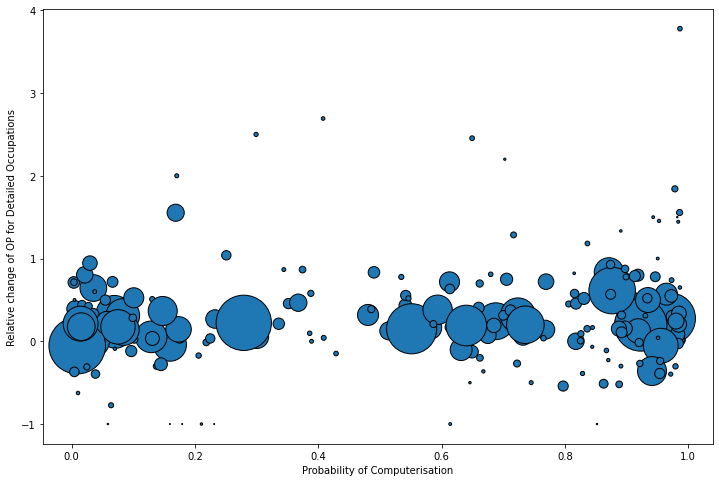

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.scatter(joint_auto3['Probability of Computerisation'],joint_auto3[0],s=joint_auto3['Total'],edgecolors='black')
plt.ylabel('Relative change of OP for Detailed Occupations')
plt.xlabel('Probability of Computerisation')
#ax.set(xlim=(0.9, 1.0), ylim=(-2, 5))   # Zoom in on plot

#plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Scatter Relative change of OP for DO")

In [35]:
joint_auto3['Probability of Computerisation'].corr(joint_auto3[0],method='spearman')

0.18983659351163887

# Weighted Pearson Correlation for Relative Change of OP

In [36]:
weighted_mean_pcom=((joint_auto3['Probability of Computerisation']*joint_auto3['Total']).sum())/(joint_auto3['Total'].sum())
weighted_mean_RC=((joint_auto3[0]*joint_auto3['Total']).sum())/(joint_auto3['Total'].sum())

(((joint_auto3['Total'])*(joint_auto3['Probability of Computerisation']-weighted_mean_pcom)*(joint_auto3[0]*weighted_mean_RC)).sum())/(joint_auto3['Total'].sum())

0.004694532882244824

# Regression

In [34]:
from sklearn.linear_model import LinearRegression

joint_auto_nonan=joint_auto[joint_auto['Old Proportion']!=0]
x_training=np.log10(joint_auto_nonan[joint_auto_nonan['Year']==2012]['Probability of Computerisation']).to_numpy().reshape(-1,1)
y_training=np.log10(joint_auto_nonan[joint_auto_nonan['Year']==2012]['Old Proportion']).to_numpy().reshape(-1,1)
weights=joint_auto_nonan[joint_auto_nonan['Year']==2012]['Total'].to_numpy().reshape(-1)
reg = LinearRegression().fit(x_training, y_training,weights)
reg.intercept_[0]
reg.coef_[0,0]

-0.10282608640856533

# Calculate Correlation Coefficients

In [15]:
np.log10(joint_auto_nonan['Probability of Computerisation']).corr(np.log10(joint_auto_nonan['Old Proportion']),method='pearson')

-0.06972747761752449

In [39]:
weighted_mean_pcom=((np.log10(joint_auto_nonan['Probability of Computerisation'])*joint_auto_nonan['Total']).sum())/(joint_auto_nonan['Total'].sum())
weighted_mean_OP=((np.log10(joint_auto_nonan['Old Proportion'])*joint_auto_nonan['Total']).sum())/(joint_auto_nonan['Total'].sum())

(((joint_auto_nonan['Total'])*(np.log10(joint_auto_nonan['Probability of Computerisation'])-weighted_mean_pcom)*(np.log10(joint_auto_nonan['Old Proportion'])*weighted_mean_OP)).sum())/(joint_auto3['Total'].sum())

0.3210496269517757

In [40]:
# import sklearn.gaussian_process as gp

# kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-6, 1e3))
# model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
# model.fit(x_training, y_training)
# params = model.kernel_.get_params()

# Plot with nan values

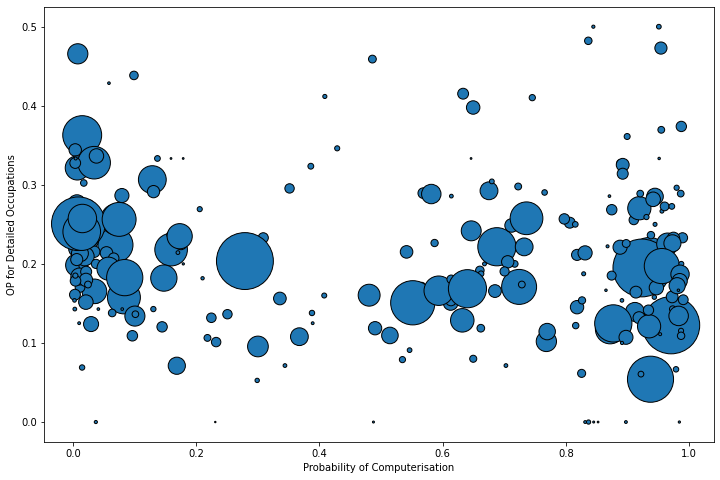

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.scatter(joint_auto[joint_auto['Year']==2012]['Probability of Computerisation'],joint_auto[joint_auto['Year']==2012]['Old Proportion'],s=joint_auto[joint_auto['Year']==2012]['Total'],edgecolors='black')

#plt.plot(x_training,(x_training*reg.coef_[0,0])+reg.intercept_[0],color='r')

plt.ylabel('OP for Detailed Occupations')
plt.xlabel('Probability of Computerisation')


#ax.set(xlim=(-3, 0.1), ylim=(-1.5, -0.2))   # Zoom in on plot

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Scatterplot of OP for DO")

# Plot with no nan values and a best fit line

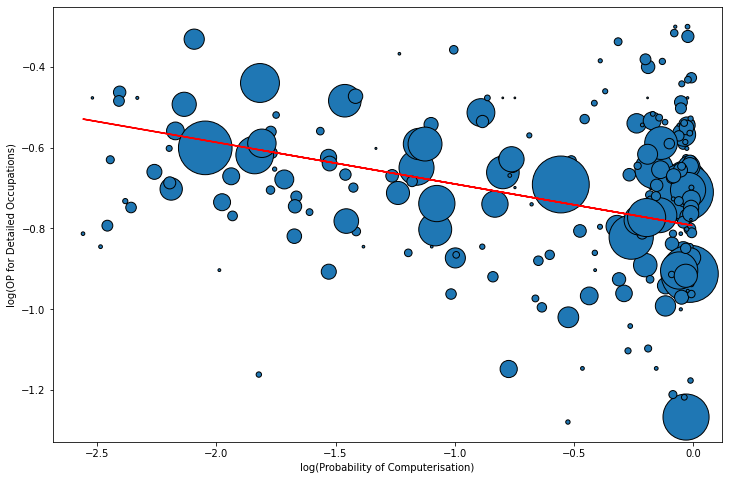

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.scatter(x_training,y_training,s=weights,edgecolors='black')

plt.plot(x_training,(x_training*reg.coef_[0,0])+reg.intercept_[0],color='r')

plt.ylabel('log(OP for Detailed Occupations)')
plt.xlabel('log(Probability of Computerisation)')

# ax.set_yscale('log')
# ax.set_xscale('log')

#ax.set(xlim=(-3, 0.1), ylim=(-1.5, -0.2))   # Zoom in on plot

plt.savefig("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Report/Figures/Weighted Least Squares")

# Plot with log scale

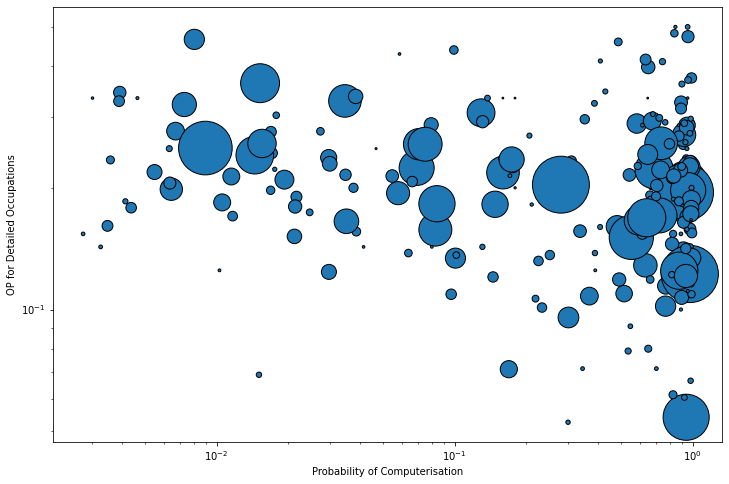

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.scatter(joint_auto_nonan[joint_auto_nonan['Year']==2012]['Probability of Computerisation'],joint_auto_nonan[joint_auto_nonan['Year']==2012]['Old Proportion'],s=joint_auto_nonan[joint_auto_nonan['Year']==2012]['Total'],edgecolors='black')

#plt.plot(x_training,(x_training*reg.coef_[0,0])+reg.intercept_[0],color='r')

plt.ylabel('OP for Detailed Occupations')
plt.xlabel('Probability of Computerisation')

ax.set_yscale('log')
ax.set_xscale('log')

#ax.set(xlim=(-3, 0.1), ylim=(-1.5, -0.2))   # Zoom in on plot

# Pearson Correlation of the log values

In [109]:
pd.DataFrame(x_training)[0].corr(pd.DataFrame(y_training)[0],method='pearson')

-0.11324129729147284

# RANSAC Linear Regressor

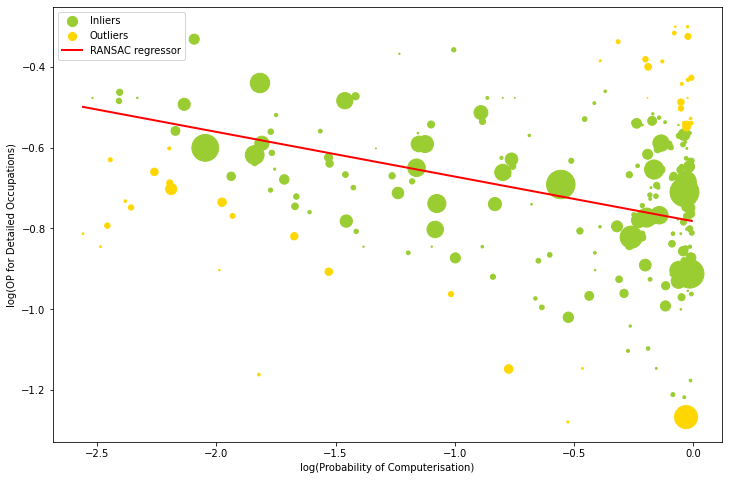

In [90]:
from sklearn import linear_model, datasets

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor(max_trials=5000,loss='squared_loss',stop_n_inliers=100)
ransac.fit(x_training, y_training,weights)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
#line_X = np.arange(x_training.min(), x_training.max())[:, np.newaxis]
line_X = np.array([x_training.min(), x_training.max()]).reshape(-1,1)
line_y_ransac = ransac.predict(line_X)

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

plt.scatter(
    x_training[inlier_mask], y_training[inlier_mask], color="yellowgreen", marker=".", label="Inliers",s=weights[inlier_mask]
)
plt.scatter(
    x_training[outlier_mask], y_training[outlier_mask], color="gold", marker=".", label="Outliers",s=weights[outlier_mask]
)
plt.plot(
    line_X,
    line_y_ransac,
    color="r",
    linewidth=2,
    label="RANSAC regressor",
)

plt.ylabel('log(OP for Detailed Occupations)')
plt.xlabel('log(Probability of Computerisation)')

plt.legend(markerscale=0.5)

In [104]:
print('gradient:',(line_y_ransac[0]-line_y_ransac[1])/(line_X[0]-line_X[1]))
print('y-intercept:',line_y_ransac[0]-((line_y_ransac[0]-line_y_ransac[1])*line_X[0]/(line_X[0]-line_X[1])))

gradient: [-0.11035232]
y-intercept: [-0.78197659]


# Huber Regressor

In [170]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor().fit(x_training, y_training.reshape(231,),weights)


Text(0.5, 0, 'Probability of Computerisation')

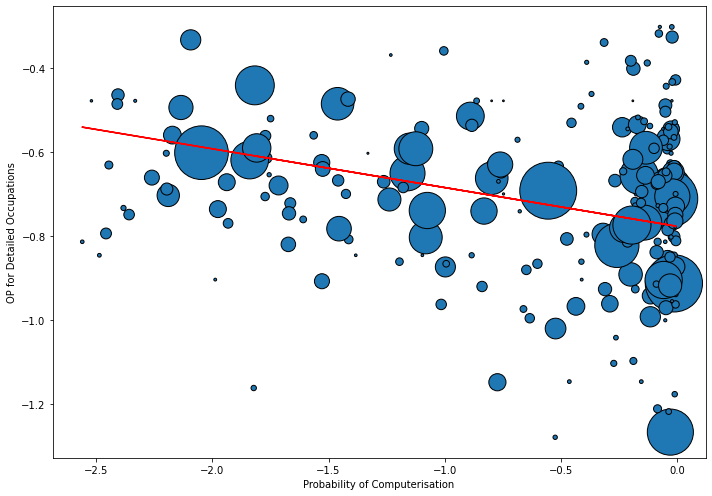

In [171]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
plt.scatter(x_training,y_training,s=weights,edgecolors='black')

plt.plot(x_training,(x_training*huber.coef_)+huber.intercept_,color='r')

plt.ylabel('OP for Detailed Occupations')
plt.xlabel('Probability of Computerisation')


# Bayesian Ridge Regressor

In [38]:
bayesreg = linear_model.BayesianRidge()
bayesreg.fit(x_training,y_training.reshape(231,),weights)


BayesianRidge()

In [93]:
bayesreg.intercept_

-0.7914816464710344

Text(0.5, 0, 'log(Probability of Computerisation)')

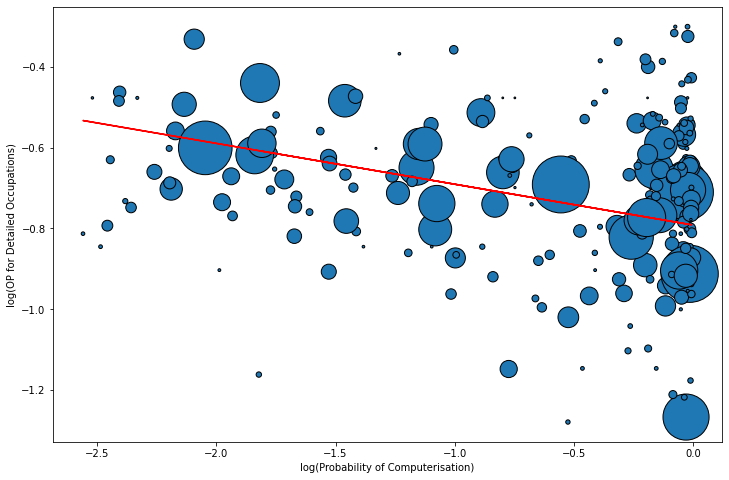

In [91]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.scatter(x_training,y_training,s=weights,edgecolors='black')

plt.plot(x_training,(x_training*bayesreg.coef_)+bayesreg.intercept_,color='r')

plt.ylabel('log(OP for Detailed Occupations)')
plt.xlabel('log(Probability of Computerisation)')

## Check bias-ness of data

In [95]:
# Check sample mean against population mean

print('Population mean for OP is', OP_major['Old Proportion'].mean())
print('Sample mean for OP is', joint_auto['Old Proportion'].mean())

print('Population mean for PoC is', auto_processed['Probability of Computerisation'].mean())
print('Sample mean for PoC is', joint_auto['Probability of Computerisation'].mean())

# Check sample variance against population variance

print('Population variance for OP is', OP_major['Old Proportion'].var())
print('Sample variance for OP is', joint_auto['Old Proportion'].var())

print('Population variance for PoC is', auto_processed['Probability of Computerisation'].var())
print('Sample variance for PoC is', joint_auto['Probability of Computerisation'].var())


Population mean for OP is 0.2204871798167431
Sample mean for OP is 0.2226696010592666
Population mean for PoC is 0.5355710290598286
Sample mean for PoC is 0.5079438891666641
Population variance for OP is 0.0018975032620759263
Sample variance for OP is 0.012159908150116798
Population variance for PoC is 0.1355171954655394
Sample variance for PoC is 0.14252694532072882


In [104]:
prop_major=pd.merge(left=prop_major,right=prop_major.groupby('Year')['Total'].sum(),left_on='Year',right_on='Year',how='left')
prop_major['Proportion']=prop_major['Total_x']/prop_major['Total_y']

joint_auto4=pd.merge(left=joint_auto[['Occupation','Total','Major Group','Minor Group','Broad Group','Detailed Occupation','Elderly Proportion','Year','Category Label']],right=prop_major[['Occupation','Year','Major Group']],left_on=['Major Group','Year'],right_on=['Major Group','Year'],how='left')

joint_auto4_sample=pd.DataFrame(joint_auto4.groupby(['Occupation_y','Year'])['Total'].sum())
joint_auto4_sample_total=pd.DataFrame(joint_auto4.groupby('Year')['Total'].sum())

joint_auto4_sample=pd.merge(left=prop_major[['Occupation','Year','Major Group']],right=joint_auto4_sample,left_on=['Occupation','Year'],right_on=['Occupation_y','Year'],how='left')

joint_auto4_sample=pd.merge(left=joint_auto4_sample,right=joint_auto4_sample_total,left_on='Year',right_on='Year',how='left')

joint_auto4_sample['Proportion']=joint_auto4_sample['Total_x']/joint_auto4_sample['Total_y']

# Create 'Difference between Proportions' column
joint_auto4=pd.merge(left=prop_major[['Occupation','Year','Proportion']],right=joint_auto4_sample[['Occupation','Year','Proportion']],left_on=['Occupation','Year'],right_on=['Occupation','Year'],how='left')
joint_auto4['Diff']=joint_auto4['Proportion_x']-joint_auto4['Proportion_y']


Text(0, 0.5, 'Population Proportion - Sample Proportion')

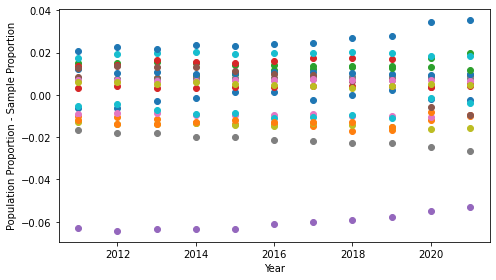

In [105]:
# Plot scatter plot for Diff against Year for all Major Groups

labels=joint_auto4['Occupation'].drop_duplicates()
for label in labels:
    plt.scatter(joint_auto4[joint_auto4['Occupation']==label]['Year'],joint_auto4[joint_auto4['Occupation']==label]['Diff'])
plt.xlabel('Year')
plt.ylabel('Population Proportion - Sample Proportion')

# Probably Approximately Correct (PAC) Learning

In [16]:
import cvxpy as cp
import math

In [123]:
# Define and solve the CVXPY problem.
x1 = cp.Variable(1)
x2 = cp.Variable(1)
x3 = cp.Variable(1)


prob = cp.Problem(cp.Minimize(x1),
                 [y_training - x2*x_training - x3 - x1 <= 0,
                  -y_training + x2*x_training + x3 - x1 <= 0])

prob.solve()

0.4854170112220878

Text(0.5, 0, 'log(Probability of Computerisation)')

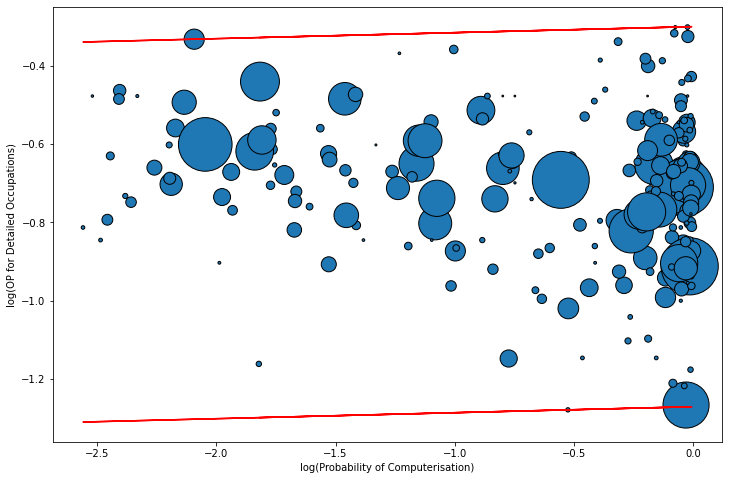

In [124]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.scatter(x_training,y_training,s=weights,edgecolors='black')

plt.plot(x_training,(x_training*x2.value[0])+x3.value[0]+x1.value[0],color='r')
plt.plot(x_training,(x_training*x2.value[0])+x3.value[0]-x1.value[0],color='r')


plt.ylabel('log(OP for Detailed Occupations)')
plt.xlabel('log(Probability of Computerisation)')

In [75]:
m = x_training.size
epsilon=0.05
sum=0

for i in range(3):
    sum=sum+math.comb(m,i)*(epsilon**i)*((1-epsilon)**(m-i))

1-sum

0.9993799909398567

In [119]:
joint_auto_nonan_2012=joint_auto_nonan[joint_auto_nonan['Year']==2012]
joint_auto_nonan_2012_log = joint_auto_nonan_2012.copy()
joint_auto_nonan_2012_log['Probability of Computerisation']=np.log10(joint_auto_nonan_2012_log['Probability of Computerisation'])
joint_auto_nonan_2012_log['Old Proportion']=np.log10(joint_auto_nonan_2012_log['Old Proportion'])

training1=joint_auto_nonan_2012_log[['Probability of Computerisation','Old Proportion','Total']]

In [120]:
for i in range(15):
    training1['upper']=training1['Probability of Computerisation']*x2.value[0] + x3.value[0] + x1.value[0]
    training1['lower']=training1['Probability of Computerisation']*x2.value[0] + x3.value[0] - x1.value[0]

    training1['upper']=training1['upper']-training1['Old Proportion']
    training1['lower']=training1['Old Proportion']-training1['lower']

    training1.drop(training1['upper'].idxmin(),inplace=True)
    training1.drop(training1['lower'].idxmin(),inplace=True)

    if training1['lower'].min()<=training1['upper'].min():
        training1.drop(training1['lower'].idxmin(),inplace=True)
    else:
        training1.drop(training1['upper'].idxmin(),inplace=True)

    # Define and solve the CVXPY problem.
    x1 = cp.Variable(1)
    x2 = cp.Variable(1)
    x3 = cp.Variable(1)


    prob = cp.Problem(cp.Minimize(x1),
                    [training1['Old Proportion'].to_numpy() - x2*training1['Probability of Computerisation'].to_numpy() - x3 - x1 <= 0,
                    -training1['Old Proportion'].to_numpy() + x2*training1['Probability of Computerisation'].to_numpy() + x3 - x1 <= 0])

    prob.solve()

<ipython-input-120-fb552f24cc0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training1['upper']=training1['Probability of Computerisation']*x2.value[0] + x3.value[0] + x1.value[0]
<ipython-input-120-fb552f24cc0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training1['lower']=training1['Probability of Computerisation']*x2.value[0] + x3.value[0] - x1.value[0]
<ipython-input-120-fb552f24cc0f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

Text(0.5, 0, 'log(Probability of Computerisation)')

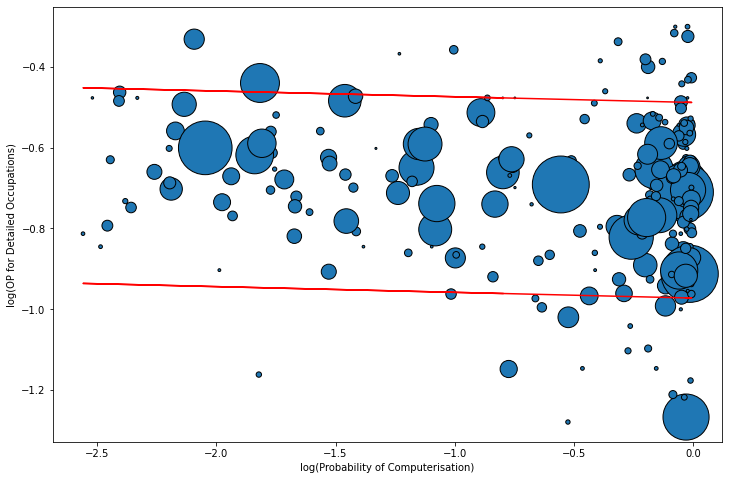

In [121]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.scatter(x_training,y_training,s=weights,edgecolors='black')

plt.plot(training1['Probability of Computerisation'],(training1['Probability of Computerisation']*x2.value[0])+x3.value[0]+x1.value[0],color='r')
plt.plot(training1['Probability of Computerisation'],(training1['Probability of Computerisation']*x2.value[0])+x3.value[0]-x1.value[0],color='r')


plt.ylabel('log(OP for Detailed Occupations)')
plt.xlabel('log(Probability of Computerisation)')


In [125]:
print(x1.value,x2.value,x3.value)

[0.48541701] [0.01528431] [-0.78532458]


In [26]:
1-training1['Total'].sum()/joint_auto_nonan_2012['Total'].sum()

0.1293684132950107

In [80]:
m = x_training.size
epsilon=0.20
r=20
sum=0

for i in range(3+r):
    sum=sum+math.comb(m,i)*(epsilon**i)*((1-epsilon)**(m-i))

1-sum

0.999987566008558